# Storytelling Case Study : Airbnb, NYC

#### Problem Statement
- Suppose that you are working as a data analyst at Airbnb. For the past few months, Airbnb has seen a major decline in revenue. - Now that the restrictions have started lifting and people have started to travel more, Airbnb wants to make sure that it is fully prepared for this change.

#### End Objective
- To prepare for the next best steps that Airbnb needs to take as a business, you have been asked to analyse a dataset consisting of various Airbnb listings in New York.

#### Presentation - I
- Data Analysis Managers: These people manage the data analysts directly for processes and their technical expertise is basic.
- Lead Data Analyst: The lead data analyst looks after the entire team of data and business analysts and is technically sound.

#### Presentation - II
- Head of Acquisitions and Operations, NYC: This head looks after all the property and host acquisitions and operations. Acquisition of the best properties, price negotiation, and negotiating the services the properties offer falls under the purview of this role.
- Head of User Experience, NYC: The head of user experience looks after the customer preferences and also handles the properties listed on the website and the Airbnb app. Basically, the head of user experience tries to optimise the order of property listing in certain neighbourhoods and cities in order to get every property the optimal amount of traction.

The diagram given below gives a better idea of what each column in the dataset used in the analysis signifies.
 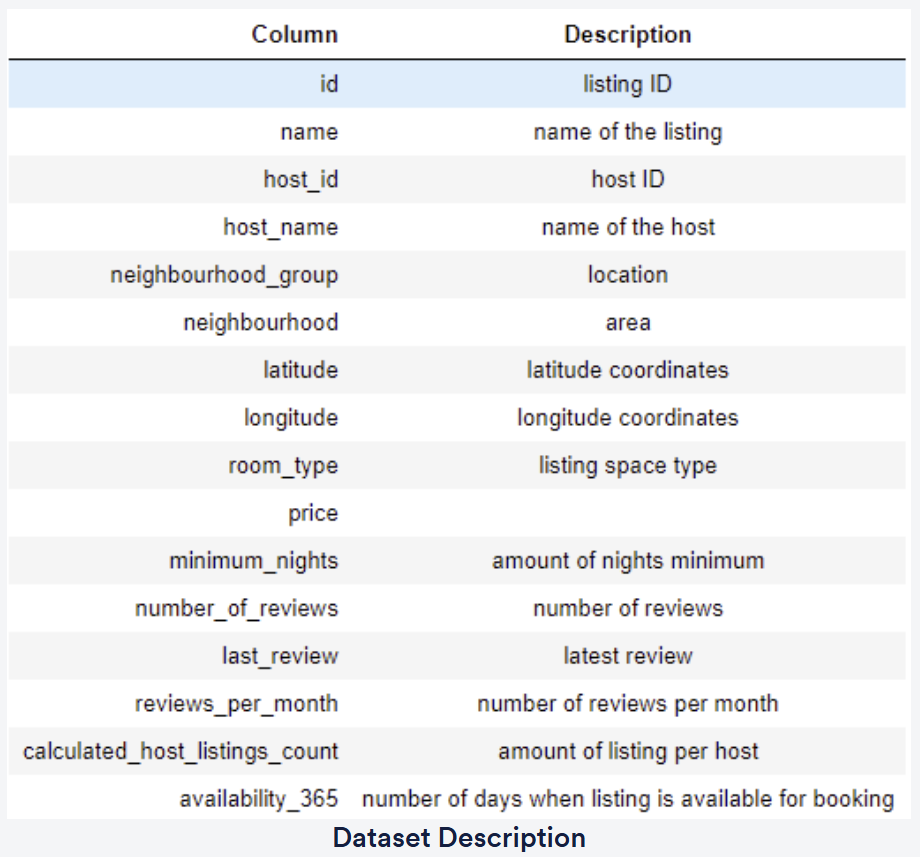

### Importing Necessary Libraries to start with Data Cleaning 

In [4]:
# Import the necessary libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
# Importing dataset and analysing the columns
data = pd.read_csv("AB_NYC_2019.csv")
data.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [6]:
# Check the rows and columns of the dataset
data.shape

(48895, 16)

- The dataset contains 48895 rows and 16 columns
- Now we have to check whether there are any missing values in the dataset

In [8]:
#checking null values and datatype of each column in a dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [9]:
# Calculating the missing values in the dataset
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

- We found that name, host_name, last_reviews and reviews_per_month columns have null values. We can drop certain columns like 'id','name','last_review' as they will have no impact.

In [11]:
# dropping columns - name, host_name, last_reviews from the dataset
data.drop(['id','name','last_review'], axis = 1, inplace = True)

In [12]:
# checking the Dataset again
data.head(5)

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


##### Treating Null Values
We also see column > "reviews_per_month" also have many null values. 

In [14]:
# Replacing Null Values in "reviews_per_month" column with 0
data.fillna({'reviews_per_month':0},inplace=True)

In [15]:
data.reviews_per_month.isnull().sum()

0

- There are no missing values present in reviews_per_month column

In [17]:
# checking number of unique values in each column
data.nunique()

host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
reviews_per_month                   938
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [18]:
# Now to check the unique values of other columns
data.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [19]:
data.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [20]:
data.host_id.value_counts().head(10)

host_id
219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: count, dtype: int64

In [21]:
data.duplicated().sum()

0

In [22]:
data.to_csv(r'C:\Users\nihar\Downloads\Airbnb_New_dataset.csv',index=False, header=True)

In [23]:
data2 = data.sort_values(by="calculated_host_listings_count",ascending=False)
data2.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
39773,219517861,Sonder (NYC),Manhattan,Hell's Kitchen,40.76037,-73.99744,Entire home/apt,185,29,1,1.00,327,332
41463,219517861,Sonder (NYC),Manhattan,Financial District,40.70782,-74.01227,Entire home/apt,396,2,8,2.12,327,289
41469,219517861,Sonder (NYC),Manhattan,Financial District,40.70620,-74.01192,Entire home/apt,498,2,8,2.50,327,255
38294,219517861,Sonder (NYC),Manhattan,Financial District,40.70771,-74.00641,Entire home/apt,229,29,1,0.73,327,219
41468,219517861,Sonder (NYC),Manhattan,Financial District,40.70726,-74.01060,Entire home/apt,229,2,2,0.77,327,351


In [42]:
data.shape

(48895, 13)